# Training CNN on `MNIST`

In [1]:
!pip install tensorflow

## Loading Dataset

In [107]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


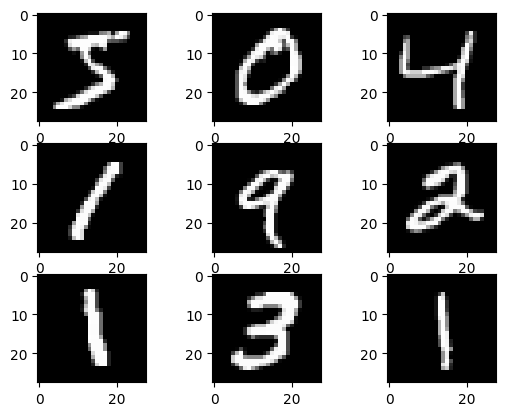

In [108]:
from matplotlib import pyplot as plt

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

plt.show()

In [109]:
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)

## Sequential Model

In [110]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [111]:
model = Sequential()

model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=3,activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=5,strides=2,padding='same',activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [112]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 12, 12, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 12, 12, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 10, 10, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 64)            │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │              

 Total params: 327,242 (1.25 MB)

 Trainable params: 326,410 (1.25 MB)

 Non-trainable params: 832 (3.25 KB)

## Model Training

In [113]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8123 - loss: 0.6161 - val_accuracy: 0.9500 - val_loss: 0.1485
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9765 - loss: 0.0774 - val_accuracy: 0.9900 - val_loss: 0.0352
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9857 - loss: 0.0496 - val_accuracy: 0.9918 - val_loss: 0.0271
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9874 - loss: 0.0419 - val_accuracy: 0.9917 - val_loss: 0.0288
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9893 - loss: 0.0374 - val_accuracy: 0.9913 - val_loss: 0.0309
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9901 - loss: 0.0331 - val_accuracy: 0.9927 - val_loss: 0.0303
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.9909 - loss: 0.0287 - val_accuracy: 0.9942 - val_loss: 0.0219
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9912 - loss: 0.0290 - val_accura

## Model Evaluation

0.9922037124633789


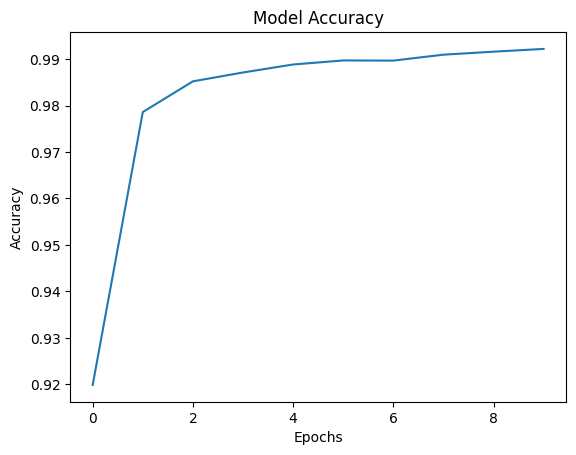

In [114]:
import matplotlib.pyplot as plt

accuracy = model.history.history['accuracy']
print(accuracy[-1])
plt.plot(accuracy)
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.show()

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [116]:
# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # For softmax output

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [117]:
accuracy = np.mean(y_pred_classes == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 99.25%


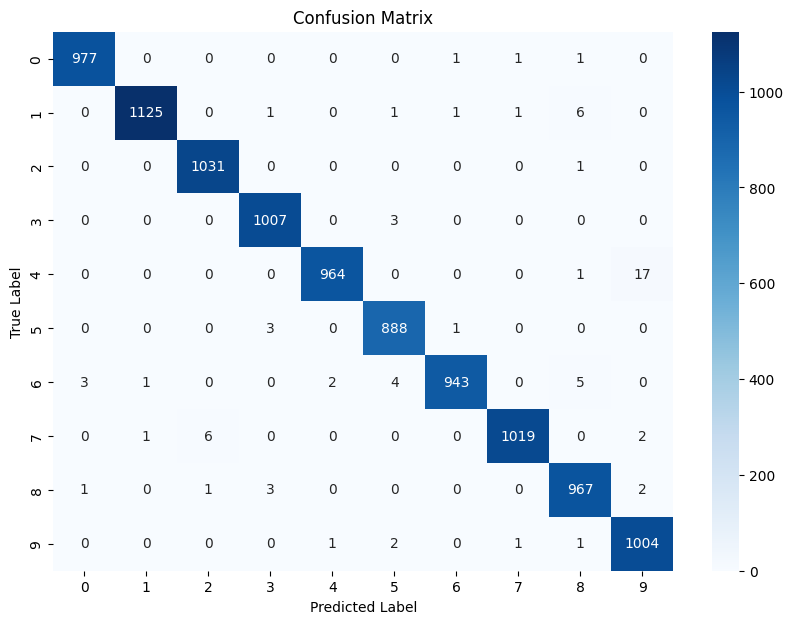

In [118]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [119]:
report = classification_report(y_test, y_pred_classes)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.99      1.00      1.00      1032
           3       0.99      1.00      1.00      1010
           4       1.00      0.98      0.99       982
           5       0.99      1.00      0.99       892
           6       1.00      0.98      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.98      1.00      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



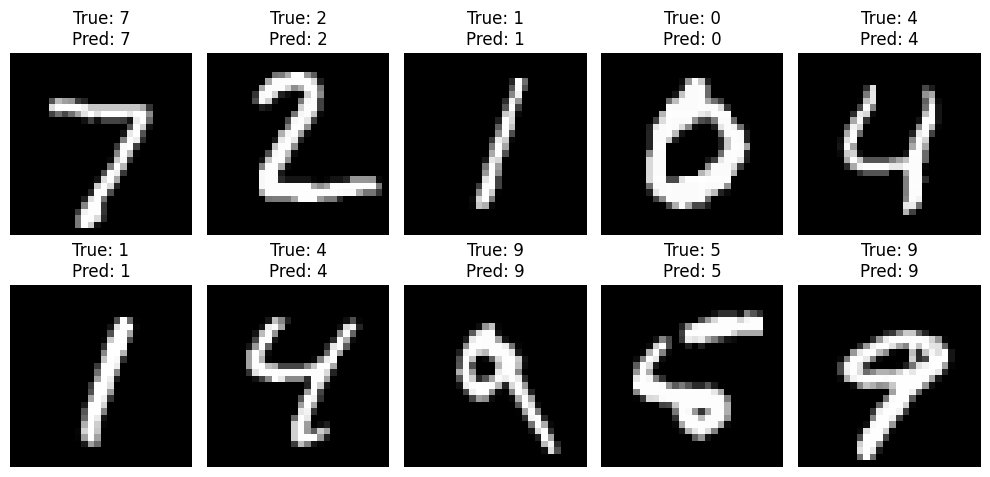

In [120]:
n = 10
plt.figure(figsize=(10, 5))

for i in range(n):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_test[i]}\nPred: {y_pred_classes[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [127]:
from tensorflow.keras.utils import to_categorical

y_test_categorical = to_categorical(y_test, 10)

model.evaluate(x_test, y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9896 - loss: 0.0330


[0.02542964555323124, 0.9925000071525574]

In [131]:
model.save("CNN-MNIST-Trained.keras")

# Transfer Learning on `EMNIST` Dataset

## Loading Pre-trained Model

In [1]:
from tensorflow.keras.models import load_model

base_model = load_model('CNN-MNIST-Trained.keras')
base_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 32 variables whereas the saved optimizer has 62 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 12, 12, 32)          │          25,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 12, 12, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 10, 10, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 64)            │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 4, 4, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │              

 Total params: 653,654 (2.49 MB)

 Trainable params: 326,410 (1.25 MB)

 Non-trainable params: 832 (3.25 KB)

 Optimizer params: 326,412 (1.25 MB)

## Loading Dataset

In [3]:
!pip install emnist

In [62]:
!mkdir -p ~/.cache/emnist

In [64]:
!cp /content/drive/MyDrive/CNN-TransferLearning/emnist.zip ~/.cache/emnist/emnist.zip

In [25]:
from emnist import extract_training_samples, extract_test_samples
x_train, y_train = extract_training_samples('byclass')
x_test, y_test = extract_test_samples('byclass')

In [13]:
import numpy as np

print(f'Shape of x_train: {x_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of x_test: {x_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of x_train: (697932, 28, 28)
Shape of y_train: (697932,)
Shape of x_test: (116323, 28, 28)
Shape of y_test: (116323,)


In [26]:
class_counts = np.bincount(y_train)

# Display the number of samples in each class
for class_id, count in enumerate(class_counts):
    print(f'Label {class_id}: {count} samples')

Label 0: 34585 samples
Label 1: 38374 samples
Label 2: 34203 samples
Label 3: 35143 samples
Label 4: 33535 samples
Label 5: 31416 samples
Label 6: 34232 samples
Label 7: 35754 samples
Label 8: 33946 samples
Label 9: 33847 samples
Label 10: 6407 samples
Label 11: 3878 samples
Label 12: 10094 samples
Label 13: 4562 samples
Label 14: 4934 samples
Label 15: 9182 samples
Label 16: 2517 samples
Label 17: 3152 samples
Label 18: 11946 samples
Label 19: 3762 samples
Label 20: 2468 samples
Label 21: 5076 samples
Label 22: 9002 samples
Label 23: 8237 samples
Label 24: 24983 samples
Label 25: 8347 samples
Label 26: 2605 samples
Label 27: 5073 samples
Label 28: 20764 samples
Label 29: 9820 samples
Label 30: 12602 samples
Label 31: 4637 samples
Label 32: 4695 samples
Label 33: 2771 samples
Label 34: 4743 samples
Label 35: 2701 samples
Label 36: 10033 samples
Label 37: 5159 samples
Label 38: 2854 samples
Label 39: 10177 samples
Label 40: 24631 samples
Label 41: 2561 samples
Label 42: 3687 samples
Lab

In [27]:
import numpy as np
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [28]:
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(y_train, 62)
y_test = tf.keras.utils.to_categorical(y_test, 62)

x_train=x_train.reshape(-1, 28,28,1)
x_test=x_test.reshape(-1, 28,28,1)

## A look of Dataset

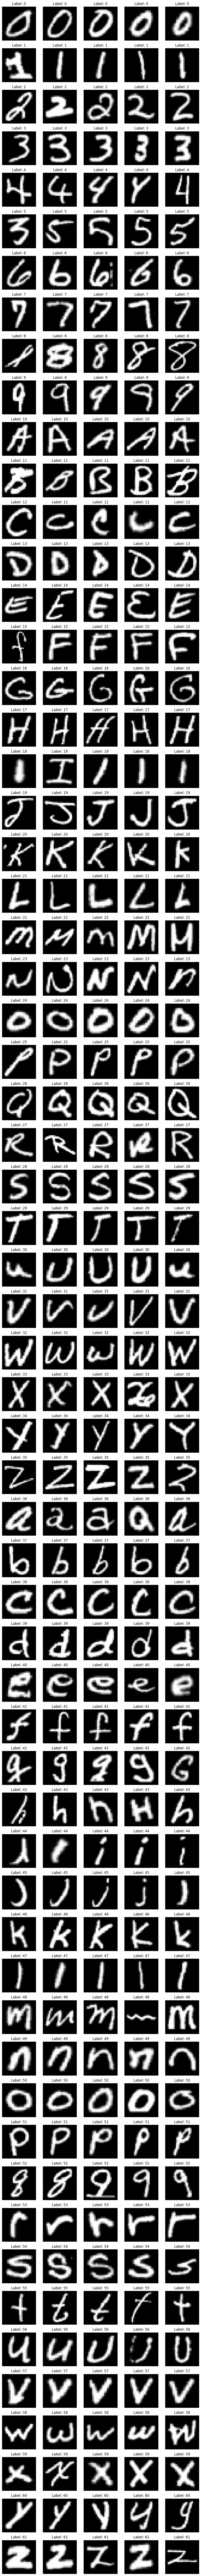

In [9]:
import matplotlib.pyplot as plt

num_classes = 62
fig, axes = plt.subplots(nrows=num_classes, ncols=5, figsize=(10, 2 * num_classes))

for class_label in range(num_classes):
    indices = np.where(y_train == class_label)[0]

    selected_indices = np.random.choice(indices, size=5, replace=False)

    for i, idx in enumerate(selected_indices):
        axes[class_label, i].imshow(x_train[idx].reshape(28, 28), cmap='gray')
        axes[class_label, i].axis('off')
        axes[class_label, i].set_title(f'Label: {class_label}')

plt.tight_layout()
plt.show()

## Model Training

>Dropped the last layer and then added a Dense with 62 classes in the end

In [5]:
from tensorflow.keras.layers import Dense
model = base_model
model.pop()
model.add(Dense(62, activation='softmax', name='output_dense_62'))

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs = 10, batch_size=32, validation_split = 0.1)

Epoch 1/10
19630/19630 ━━━━━━━━━━━━━━━━━━━━ 112s 5ms/step - accuracy: 0.7896 - loss: 0.6679 - val_accuracy: 0.8573 - val_loss: 0.3824
Epoch 2/10
19630/19630 ━━━━━━━━━━━━━━━━━━━━ 149s 6ms/step - accuracy: 0.8459 - loss: 0.4341 - val_accuracy: 0.8652 - val_loss: 0.3641
Epoch 3/10
19630/19630 ━━━━━━━━━━━━━━━━━━━━ 120s 5ms/step - accuracy: 0.8541 - loss: 0.4092 - val_accuracy: 0.8674 - val_loss: 0.3547
Epoch 4/10
19630/19630 ━━━━━━━━━━━━━━━━━━━━ 91s 5ms/step - accuracy: 0.8573 - loss: 0.3953 - val_accuracy: 0.8683 - val_loss: 0.3535
Epoch 5/10
19630/19630 ━━━━━━━━━━━━━━━━━━━━ 143s 5ms/step - accuracy: 0.8590 - loss: 0.3882 - val_accuracy: 0.8717 - val_loss: 0.3449
Epoch 6/10
19630/19630 ━━━━━━━━━━━━━━━━━━━━ 92s 5ms/step - accuracy: 0.8626 - loss: 0.3806 - val_accuracy: 0.8722 - val_loss: 0.3413
Epoch 7/10
19630/19630 ━━━━━━━━━━━━━━━━━━━━ 141s 5ms/step - accuracy: 0.8633 - loss: 0.3765 - val_accuracy: 0.8743 - val_loss: 0.3355
Epoch 8/10
19630/19630 ━━━━━━━━━━━━━━━━━━━━ 141s 5ms/step - accu

## Model Saving

In [8]:
import shutil
model.save("model.h5")
!cp model.h5 /content/drive/MyDrive/model.h5

## Model Evaluation

In [9]:
model.evaluate(x_test,y_test)

3636/3636 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8749 - loss: 0.3335


[0.3324836790561676, 0.8753900527954102]

In [15]:
# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

3636/3636 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


In [16]:
accuracy = np.mean(y_pred_classes == y_test_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 87.54%


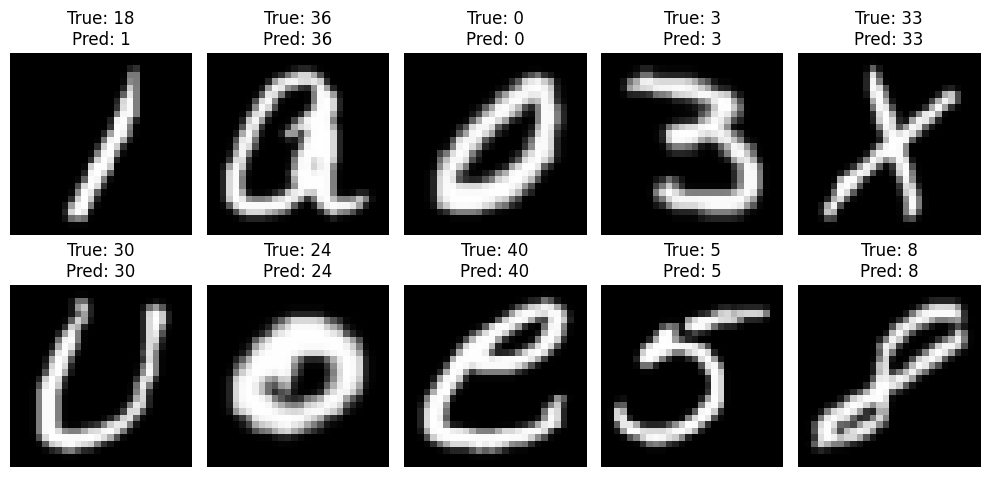

In [21]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(10, 5))

for i in range(n):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {y_test_classes[i]}\nPred: {y_pred_classes[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()